In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### MNIST dataset

In [2]:
# Function to one-hot encode the target variable into the 10 classes (0-9)
# Input shape: (N,),    Output: (N, 10)
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

In [3]:
# Loading the MNIST dataset
train_data = pd.read_csv(r"./mnist_train.csv")
test_data = pd.read_csv(r"./mnist_test.csv")

# Preprocessing the data
train_data = train_data.to_numpy()    # train_data shape: (60000, 785)
test_data = test_data.to_numpy()      # test_data shape: (10000, 785)

X_train = train_data[:,1:]            # X_train shape: (60000, 784)
y_train = train_data[:,0]             # y_train shape: (60000,)
X_test = test_data[:,1:]              # X_test shape: (10000, 784)
y_test = test_data[:,0]               # y_test shape: (10000,)

X_train = X_train / 255.0           # Normalizing the data
X_test = X_test / 255.0

# one_hot_y_train = one_hot(y_train)  # one_hot_y_train shape: (60000, 10)
# one_hot_y_test = one_hot(y_test)    # one_hot_y_test shape: (10000, 10)

In [4]:
X_test = X_test.T
X_train = X_train.T

In [5]:
m, n = train_data.shape

In [6]:
def init_params():
  w1 = np.random.rand(20,784) - 0.5
  b1 = np.random.rand(20,1) - 0.5

  w2 = np.random.rand(10,20) - 0.5
  b2 = np.random.rand(10,1) - 0.5

  w3 = np.random.rand(10,10) - 0.5
  b3 = np.random.rand(10,1) - 0.5

  return w1, b1, w2, b2

In [7]:
def sigmoid(z):
  # z = np.clip(z, -500, 500)

  return 1 / (1 + np.exp(-z))

def ReLU(Z):
  return np.maximum(Z, 0)

def softmax(Z):
  Z_new = Z - np.max(Z, axis=0, keepdims=True)
  A = np.exp(Z_new) / np.sum(np.exp(Z_new), axis=0, keepdims=True)

  return A

def deriv_ReLU(Z):
  return Z > 0

def deriv_sigmoid(Z):
  # print(Z.min(), Z.max())

  return Z * (1 - Z)

def cross_entropy_loss(Y, Y_hat):
  return -np.mean(Y * np.log(Y_hat))

In [8]:
def forward_prop(w1, b1, w2, b2, X):
  z1 = w1.dot(X) + b1
  a1 = sigmoid(z1)

  z2 = w2.dot(a1) + b2
  a2 = softmax(z2)

  return z1, a1, z2, a2

def back_prop(z1, a1, z2, a2, w2, Y, X, loss="ce"):
  OneHot_Y = one_hot(Y).T
  if loss == "ce":
    dZ2 = (a2 - OneHot_Y) / m
  elif loss == "tss":
    dZ2=(a2 - OneHot_Y) * a2 * (1 - a2) / m

  dW2 = dZ2.dot(a1.T)
  db2 = np.sum(dZ2, axis=1, keepdims=True)

  dZ1 = w2.T.dot(dZ2) * deriv_sigmoid(a1)
  dW1 = dZ1.dot(X.T)
  db1 = np.sum(dZ1, axis=1, keepdims=True)

  return dW1, db1, dW2, db2

In [9]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - (alpha * dW1)
  b1 = b1 - (alpha * db1)

  W2 = W2 - (alpha * dW2)
  b2 = b2 - (alpha * db2)

  return W1, b1, W2, b2

def get_predictions(a2):
  return np.argmax(a2,0)

def get_accuracy(predictions, Y):
  # print(predictions, Y)

  return np.sum(predictions == Y) / Y.size

In [10]:

def train(X, Y, iterations, alpha):
  w1, b1, w2, b2 = init_params()

  for i in range(iterations):
    z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)

    dW1, db1, dW2, db2 = back_prop(z1, a1, z2, a2, w2, Y, X, "ce")

    w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dW1, db1, dW2, db2, alpha)

    if i % 10 == 0:
      print("Iterations: ", i, end=", ")
      print("Accuracy: ", get_accuracy(get_predictions(a2),Y), end = ", ")
      print("Loss: ", cross_entropy_loss(one_hot(Y).T, a2))

  return w1, b1, w2, b2

In [11]:
def make_predictions(X, W1, b1, W2, b2):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = get_predictions(A2)

  return predictions

def test_prediction(index, W1, b1, W2, b2):
  current_image = X_train[:, index, None]
  prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
  label = y_train[index]
  print("Prediction: ", prediction)
  print("Label: ", label)

  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')

  plt.show()

In [15]:
w1, b1, w2, b2 = train(X_train, y_train, 600, 0.6)

Iterations:  0, Accuracy:  0.07871666666666667, Loss:  0.2621065662341196
Iterations:  10, Accuracy:  0.30155, Loss:  0.21147850400221793
Iterations:  20, Accuracy:  0.5020166666666667, Loss:  0.1861427005140999
Iterations:  30, Accuracy:  0.5994666666666667, Loss:  0.16234692166026823
Iterations:  40, Accuracy:  0.66065, Loss:  0.14130629146251478
Iterations:  50, Accuracy:  0.7036, Loss:  0.12357797578872114
Iterations:  60, Accuracy:  0.7351333333333333, Loss:  0.10925233091564812
Iterations:  70, Accuracy:  0.7588333333333334, Loss:  0.09819921722996111
Iterations:  80, Accuracy:  0.7762666666666667, Loss:  0.0897361978536791
Iterations:  90, Accuracy:  0.7890833333333334, Loss:  0.08309723679664283
Iterations:  100, Accuracy:  0.8008333333333333, Loss:  0.0777509527170002
Iterations:  110, Accuracy:  0.8104666666666667, Loss:  0.07334438663778861
Iterations:  120, Accuracy:  0.81815, Loss:  0.06963842966290286
Iterations:  130, Accuracy:  0.82525, Loss:  0.0664675757456336
Iterati

Prediction:  [5]
Label:  5


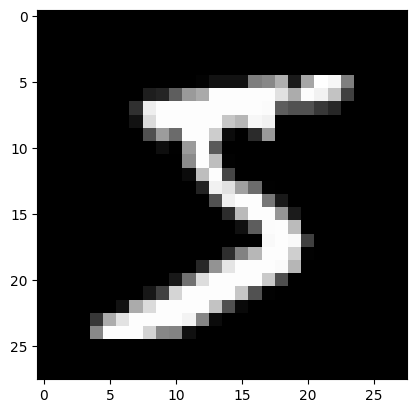

In [16]:
test_prediction(0, w1, b1, w2, b2)

In [17]:
test_predictions = make_predictions(X_test, w1, b1, w2, b2)
get_accuracy(test_predictions, y_test)

np.float64(0.9134)

#### Training on the other Boolean functions

In [18]:
def generate_n_bit_numbers(n):
  return [list(map(int, bin(i)[2:].zfill(n))) for i in range(2 ** n)]

x_2_list = generate_n_bit_numbers(2)
x_4_list = generate_n_bit_numbers(4)
x_5_list = generate_n_bit_numbers(5)

x_2 = np.array(x_2_list)
x_4 = np.array(x_4_list)
x_5 = np.array(x_5_list)

In [19]:
print(f"x_2_list: {x_2_list}")
print(f"x_4_list: {x_4_list}")
print(f"x_5_list: {x_5_list}")

print(f"x_2: {x_2}")
print(f"x_4: {x_4}")
print(f"x_5: {x_5}")

x_2_list: [[0, 0], [0, 1], [1, 0], [1, 1]]
x_4_list: [[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]]
x_5_list: [[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1], [0, 0, 1, 0, 0], [0, 0, 1, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 1], [0, 1, 0, 0, 0], [0, 1, 0, 0, 1], [0, 1, 0, 1, 0], [0, 1, 0, 1, 1], [0, 1, 1, 0, 0], [0, 1, 1, 0, 1], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [1, 0, 0, 0, 0], [1, 0, 0, 0, 1], [1, 0, 0, 1, 0], [1, 0, 0, 1, 1], [1, 0, 1, 0, 0], [1, 0, 1, 0, 1], [1, 0, 1, 1, 0], [1, 0, 1, 1, 1], [1, 1, 0, 0, 0], [1, 1, 0, 0, 1], [1, 1, 0, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 0, 0], [1, 1, 1, 0, 1], [1, 1, 1, 1, 0], [1, 1, 1, 1, 1]]
x_2: [[0 0]
 [0 1]
 [1 0]
 [1 1]]
x_4: [[0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1

In [20]:
def xor_function(x):
  y = [int(np.bitwise_xor.reduce(seq)) for seq in x]

  return y

def palindrome_function(x):
  y = [int(seq == seq[::-1]) for seq in x]

  return y

def even_parity_function(x):
  y = [int(sum(seq) % 2 == 0) for seq in x]

  return y

In [21]:
x_2_xor_y = np.array(xor_function(x_2_list))

x_4_palindrome_y = np.array(palindrome_function(x_4_list))
x_5_palindrome_y = np.array(palindrome_function(x_5_list))

x_4_even_parity_y = np.array(even_parity_function(x_4_list))
x_5_even_parity_y = np.array(even_parity_function(x_5_list))

In [22]:
print(f"x_2_xor_y: {x_2_xor_y}")

print(f"x_4_palindrome_y: {x_4_palindrome_y}")
print(f"x_5_palindrome_y: {x_5_palindrome_y}")

print(f"x_4_even_parity_y: {x_4_even_parity_y}")
print(f"x_5_even_parity_y: {x_5_even_parity_y}")

x_2_xor_y: [0 1 1 0]
x_4_palindrome_y: [1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1]
x_5_palindrome_y: [1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1]
x_4_even_parity_y: [1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1]
x_5_even_parity_y: [1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0]


In [23]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(a):
  return a * (1 - a)

def relu(x):
  return np.maximum(0, x)

def relu_derivative(a):
  return np.where(a > 0, 1, 0)

def mse(y, y_hat):
  assert(y.shape == y_hat.shape)

  return np.mean((y - y_hat) ** 2)

def bce(y, y_hat):
  assert(y.shape == y_hat.shape)

  return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

In [24]:
class SigmoidNN:
  def __init__(self, arch, x, y, lr=0.1, epochs=1000, loss_func="bce"):
    self.arch = arch
    self.x = x
    self.no_of_samples = x.shape[0]
    self.y = y

    if len(y.shape) == 1:
      self.y = y.reshape(-1, 1)
      y = self.y

    assert(x.shape[0] == y.shape[0])
    assert(x.shape[1] == arch[0])
    assert(arch[-1] == y.shape[1])

    self.lr = lr
    self.epochs = epochs
    self.loss_func = loss_func
    self.losses = []

    self.W = [np.random.rand(arch[i], arch[i + 1]) for i in range(len(arch) - 1)]
    self.b = [np.random.rand(1, arch[i + 1]) for i in range(len(arch) - 1)]

  def forward(self):
    self.z = []
    self.a = [self.x]
    for i in range(len(self.arch)-1):
      self.z.append(np.dot(self.a[i], self.W[i]) + self.b[i])
      self.a.append(sigmoid(self.z[i]))

    return self.a[-1]

  def backward(self):
    y = self.y

    if self.loss_func == "bce":
      self.dz = [(self.a[-1] - y) / self.no_of_samples]
    elif self.loss_func == "mse":
      self.dz = [2*(self.a[-1] - y) * sigmoid_derivative(self.a[-1]) / self.no_of_samples]

    else:
      raise ValueError("Invalid loss function")

    for i in range(len(self.arch) - 2, -1, -1):
      self.dW = np.dot(self.a[i].T, self.dz[-1])
      assert(self.dW.shape == self.W[i].shape)

      self.db = np.sum(self.dz[-1], axis=0, keepdims=True)
      assert(self.db.shape == self.b[i].shape)

      dz_temp = np.dot(self.dz[-1], self.W[i].T) * sigmoid_derivative(self.a[i])
      assert(dz_temp.shape == self.a[i].shape)

      self.dz.append(dz_temp)
      self.W[i] -= self.lr * self.dW
      self.b[i] -= self.lr * self.db

  def train(self, print_epoch=100):
    for _ in range(self.epochs):
      y_hat = self.forward()
      self.backward()

      if self.loss_func == "bce":
        self.losses.append(bce(self.y, y_hat))
      elif self.loss_func == "mse":
        self.losses.append(mse(self.y, y_hat))

      if _ % print_epoch == 0:
        print(f"Epoch {_}: Loss = {self.losses[-1]}, Accuracy = {self.accuracy(y_hat)}")

  def predict(self, y_hat):
    return (y_hat > 0.5).astype(int)

  def plot_loss(self):
    plt.plot(self.losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss vs Epoch")

    plt.show()

  def accuracy(self, y_hat):
    assert(y_hat.shape == self.y.shape)
    y_pred = self.predict(y_hat)
    assert(y_pred.shape == self.y.shape)

    return np.mean(self.y == y_pred)

  def print_weights_and_biases(self):
    for i in range(len(self.W)):
      print(f"Layer {i + 1}")
      print(f"W = {self.W[i]}")
      print(f"b = {self.b[i]}")

Epoch 0: Loss = 0.28723438584044436, Accuracy = 0.5
Epoch 10000: Loss = 0.03448797452619151, Accuracy = 1.0
Epoch 20000: Loss = 0.0031242311736560196, Accuracy = 1.0
Epoch 30000: Loss = 0.0015006620939005944, Accuracy = 1.0
Epoch 40000: Loss = 0.0009715655803082042, Accuracy = 1.0
Epoch 50000: Loss = 0.000713633602259452, Accuracy = 1.0
Epoch 60000: Loss = 0.000562012317262609, Accuracy = 1.0
Epoch 70000: Loss = 0.00046258835857697193, Accuracy = 1.0
Epoch 80000: Loss = 0.0003925313402778321, Accuracy = 1.0
Epoch 90000: Loss = 0.000340586421011268, Accuracy = 1.0


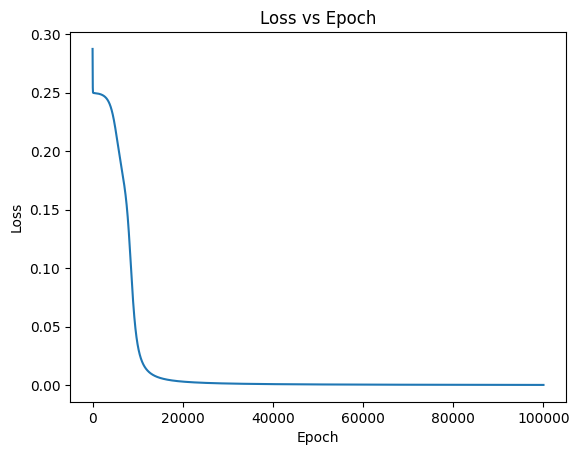

Layer 1
W = [[4.58692658 6.48265815]
 [4.58404552 6.47077486]]
b = [[-7.03713681 -2.87823166]]
Layer 2
W = [[-10.30234446]
 [  9.60048751]]
b = [[-4.44007119]]


In [26]:
nn_xor_mse = SigmoidNN([2,2,1], x_2, x_2_xor_y, 0.1, 100000, loss_func="mse")
nn_xor_mse.train(print_epoch=10000)
nn_xor_mse.plot_loss()
nn_xor_mse.print_weights_and_biases()

Epoch 0: Loss = 0.9869804083407696, Accuracy = 0.5
Epoch 10000: Loss = 0.020529952347490374, Accuracy = 1.0
Epoch 20000: Loss = 0.00659041708585127, Accuracy = 1.0
Epoch 30000: Loss = 0.0038852585979223704, Accuracy = 1.0
Epoch 40000: Loss = 0.0027470139369252036, Accuracy = 1.0
Epoch 50000: Loss = 0.0021220296406500153, Accuracy = 1.0
Epoch 60000: Loss = 0.0017275971926887556, Accuracy = 1.0
Epoch 70000: Loss = 0.001456232593956492, Accuracy = 1.0
Epoch 80000: Loss = 0.0012582125685827916, Accuracy = 1.0
Epoch 90000: Loss = 0.0011073940459184058, Accuracy = 1.0


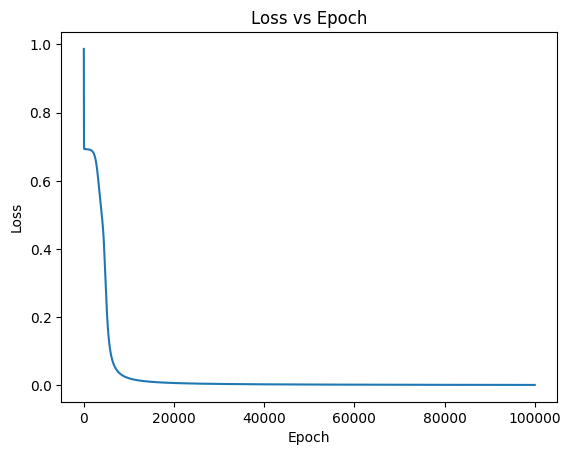

Layer 1
W = [[7.91882275 6.12907247]
 [7.92992034 6.13112911]]
b = [[-3.66848745 -9.36504488]]
Layer 2
W = [[ 14.86258327]
 [-15.65122123]]
b = [[-7.03379742]]


In [27]:
nn_xor_bce = SigmoidNN([2,2,1], x_2, x_2_xor_y, 0.1, 100000, loss_func="bce")
nn_xor_bce.train(print_epoch=10000)
nn_xor_bce.plot_loss()
nn_xor_bce.print_weights_and_biases()

Epoch 0: Loss = 0.5827658312433437, Accuracy = 0.25
Epoch 10000: Loss = 0.18018525110876304, Accuracy = 0.75
Epoch 20000: Loss = 0.15378915237401616, Accuracy = 0.8125
Epoch 30000: Loss = 0.10863920643736778, Accuracy = 0.875
Epoch 40000: Loss = 0.02419020899323505, Accuracy = 1.0
Epoch 50000: Loss = 0.0061120595454521144, Accuracy = 1.0
Epoch 60000: Loss = 0.003030221497815492, Accuracy = 1.0
Epoch 70000: Loss = 0.0019347698662383049, Accuracy = 1.0
Epoch 80000: Loss = 0.0013968017262048532, Accuracy = 1.0
Epoch 90000: Loss = 0.001083019117405232, Accuracy = 1.0


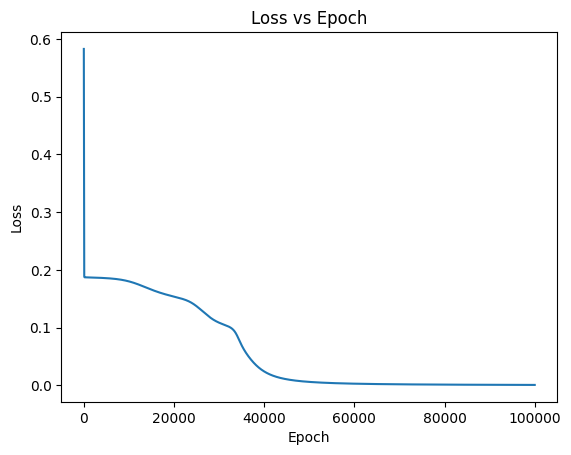

Layer 1
W = [[ 4.23792787 -3.66229014  4.7947845 ]
 [-7.6265637   7.88503654  3.78577822]
 [ 8.029663   -7.45589461  4.18949184]
 [-3.7608749   4.1868137   4.87516509]]
b = [[1.83574499 1.74083927 0.05712306]]
Layer 2
W = [[  9.64596738]
 [  9.67588795]
 [-10.8343142 ]]
b = [[-3.76083544]]


In [28]:
nn_pal_4_mse = SigmoidNN([4,3,1], x_4, x_4_palindrome_y, 0.1, 100000, loss_func="mse")
nn_pal_4_mse.train(print_epoch=10000)
nn_pal_4_mse.plot_loss()
nn_pal_4_mse.print_weights_and_biases()

Epoch 0: Loss = 1.5399027606376523, Accuracy = 0.25
Epoch 10000: Loss = 0.48496112124839497, Accuracy = 0.8125
Epoch 20000: Loss = 0.2524293440198704, Accuracy = 0.875
Epoch 30000: Loss = 0.19209289079695738, Accuracy = 0.875
Epoch 40000: Loss = 0.18293989862255633, Accuracy = 0.875
Epoch 50000: Loss = 0.1796980764063858, Accuracy = 0.875
Epoch 60000: Loss = 0.17805835542703763, Accuracy = 0.875
Epoch 70000: Loss = 0.17707209556226114, Accuracy = 0.875
Epoch 80000: Loss = 0.17641435318523224, Accuracy = 0.875
Epoch 90000: Loss = 0.17594433363706385, Accuracy = 0.875


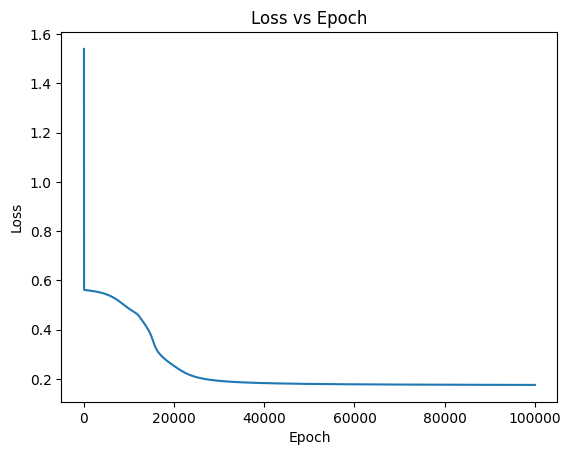

Layer 1
W = [[ 7.29164263e+00 -1.18042062e-03 -5.14576549e+00]
 [ 6.10330924e+00  4.43044081e+00  5.57402435e+00]
 [ 6.11448721e+00  4.43906866e+00  5.59105135e+00]
 [ 7.30934055e+00 -1.18018561e-03 -5.14811946e+00]]
b = [[-3.40426149 -7.41667697  7.32521927]]
Layer 2
W = [[-12.33570892]
 [  9.11912898]
 [-12.50476054]]
b = [[17.44774786]]


In [29]:
nn_pal_4_bce = SigmoidNN([4,3,1], x_4, x_4_palindrome_y, 0.1, 100000, loss_func="bce")
nn_pal_4_bce.train(print_epoch=10000)
nn_pal_4_bce.plot_loss()
nn_pal_4_bce.print_weights_and_biases()

Epoch 0: Loss = 0.5899860854780107, Accuracy = 0.25
Epoch 10000: Loss = 0.18205809130351402, Accuracy = 0.75
Epoch 20000: Loss = 0.15939207918972115, Accuracy = 0.8125
Epoch 30000: Loss = 0.14234839452580145, Accuracy = 0.8125
Epoch 40000: Loss = 0.1252275744798886, Accuracy = 0.8125
Epoch 50000: Loss = 0.12313259518656998, Accuracy = 0.8125
Epoch 60000: Loss = 0.12220632782813066, Accuracy = 0.84375
Epoch 70000: Loss = 0.12164421380966904, Accuracy = 0.84375
Epoch 80000: Loss = 0.12126396022311758, Accuracy = 0.84375
Epoch 90000: Loss = 0.12098922475674134, Accuracy = 0.84375
Epoch 100000: Loss = 0.1207813432487677, Accuracy = 0.84375
Epoch 110000: Loss = 0.12061848923339641, Accuracy = 0.84375
Epoch 120000: Loss = 0.12048738560295336, Accuracy = 0.84375
Epoch 130000: Loss = 0.12037948903038276, Accuracy = 0.84375
Epoch 140000: Loss = 0.12028905264146951, Accuracy = 0.84375
Epoch 150000: Loss = 0.12021206814241658, Accuracy = 0.84375
Epoch 160000: Loss = 0.12014565408799571, Accuracy 

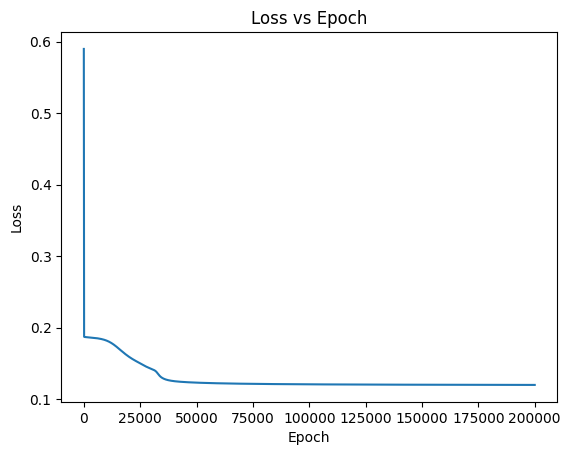

Layer 1
W = [[ 6.07500821e+00  1.57263554e+00  4.38504683e+00]
 [ 5.85954906e+00  1.56394842e+00 -8.68187115e-03]
 [ 3.68425181e-02  4.93474263e-01 -5.23885498e-03]
 [ 5.87042721e+00  1.51474626e+00 -8.63003328e-03]
 [ 6.07867033e+00  1.77211289e+00  4.38172327e+00]]
b = [[-1.11364006  0.62615746 -9.09248507]]
Layer 2
W = [[-7.7875503 ]
 [ 0.51853724]
 [ 5.64110603]]
b = [[4.91637636]]


In [30]:
nn_pal_5_mse = SigmoidNN([5,3,1], x_5, x_5_palindrome_y, 0.1, 200000, loss_func="mse")
nn_pal_5_mse.train(print_epoch=10000)
nn_pal_5_mse.plot_loss()
nn_pal_5_mse.print_weights_and_biases()

Epoch 0: Loss = 1.2783871097323551, Accuracy = 0.25
Epoch 10000: Loss = 0.3970010679006629, Accuracy = 0.8125
Epoch 20000: Loss = 0.11804512461903048, Accuracy = 1.0
Epoch 30000: Loss = 0.07296384117599315, Accuracy = 1.0
Epoch 40000: Loss = 0.048220580912451086, Accuracy = 1.0
Epoch 50000: Loss = 0.018945528391784996, Accuracy = 1.0
Epoch 60000: Loss = 0.01312399031874402, Accuracy = 1.0
Epoch 70000: Loss = 0.010225164756151855, Accuracy = 1.0
Epoch 80000: Loss = 0.008450283569636424, Accuracy = 1.0
Epoch 90000: Loss = 0.0072363043320290005, Accuracy = 1.0


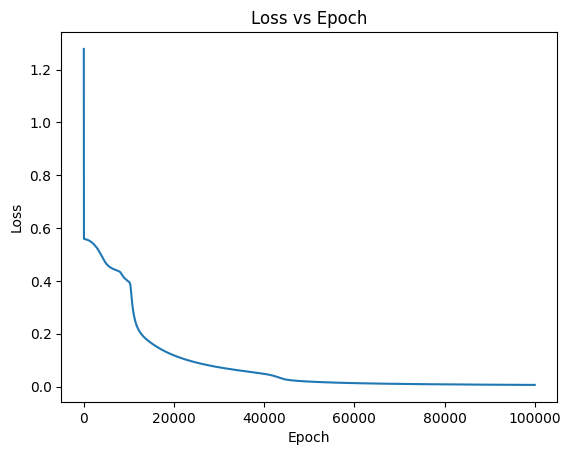

Layer 1
W = [[ 1.74112033e+00 -7.75199944e-01  6.63108037e+00]
 [ 1.74886964e+00  6.49887159e+00 -7.68860085e-01]
 [-5.94882338e-04 -2.59426812e-03 -2.22733391e-03]
 [ 1.74886877e+00  6.49884635e+00 -7.68860079e-01]
 [ 1.74112042e+00 -7.75199945e-01  6.63108319e+00]]
b = [[ -2.31487713 -11.08122719 -11.32265224]]
Layer 2
W = [[-34.29758232]
 [ 27.26465609]
 [ 27.0624392 ]]
b = [[6.88678067]]


In [31]:
nn_pal_5_bce = SigmoidNN([5,3,1], x_5, x_5_palindrome_y, 0.2, 100000, loss_func="bce")
nn_pal_5_bce.train(print_epoch=10000)
nn_pal_5_bce.plot_loss()
nn_pal_5_bce.print_weights_and_biases()

Epoch 0: Loss = 0.44116070336099444, Accuracy = 0.5
Epoch 10000: Loss = 0.2499989699675907, Accuracy = 0.5
Epoch 20000: Loss = 0.24999435825997432, Accuracy = 0.5
Epoch 30000: Loss = 0.24998939878375598, Accuracy = 0.5625
Epoch 40000: Loss = 0.2499781257701415, Accuracy = 0.5625
Epoch 50000: Loss = 0.2499446977602066, Accuracy = 0.625
Epoch 60000: Loss = 0.2497750461598048, Accuracy = 0.625
Epoch 70000: Loss = 0.24019059605145365, Accuracy = 0.6875
Epoch 80000: Loss = 0.07617895532748108, Accuracy = 0.9375
Epoch 90000: Loss = 0.061998368553699876, Accuracy = 0.9375
Epoch 100000: Loss = 0.05582997852497355, Accuracy = 0.9375
Epoch 110000: Loss = 0.05345712755237293, Accuracy = 0.9375
Epoch 120000: Loss = 0.05238323752889121, Accuracy = 0.9375
Epoch 130000: Loss = 0.0517987403518119, Accuracy = 0.9375
Epoch 140000: Loss = 0.05143749400998726, Accuracy = 0.9375
Epoch 150000: Loss = 0.051194038294965424, Accuracy = 0.9375
Epoch 160000: Loss = 0.05101956890824132, Accuracy = 0.9375
Epoch 17

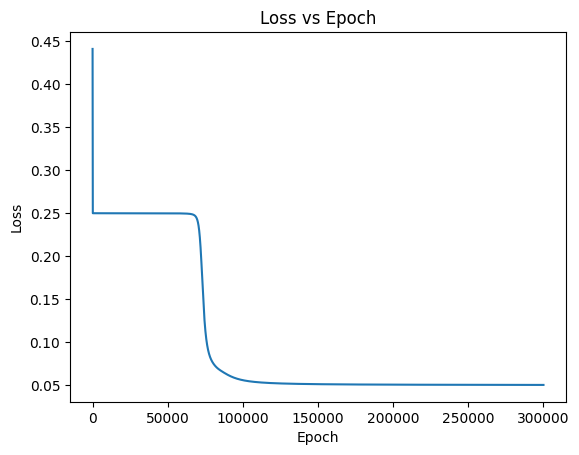

Layer 1
W = [[ 2.89251657  6.87484179  7.33859296 -3.43095168  3.69388325]
 [ 3.23363687  6.87702758  7.37019981 -3.26788704  3.55174739]
 [ 3.60403153  6.86861199  7.2570837  -3.86402346  2.61472078]
 [ 3.41332917  6.8734115   7.31360111 -3.02212746  3.59900948]]
b = [[ -0.81545131 -13.98430964 -10.26929533   0.91260057  -0.90360216]]
Layer 2
W = [[ -4.82811257]
 [-10.67297075]
 [ 16.15160616]
 [  6.09837065]
 [ -4.99628774]]
b = [[2.94296646]]


In [32]:
nn_even_4 = SigmoidNN([4,5,1], x_4, x_4_even_parity_y, 0.2, 300000, loss_func="mse")
nn_even_4.train(print_epoch=10000)
nn_even_4.plot_loss()
nn_even_4.print_weights_and_biases()

Epoch 0: Loss = 0.39658442191963394, Accuracy = 0.5
Epoch 10000: Loss = 0.250017454552925, Accuracy = 0.5
Epoch 20000: Loss = 0.2500080787596227, Accuracy = 0.5
Epoch 30000: Loss = 0.25000489368496165, Accuracy = 0.53125
Epoch 40000: Loss = 0.250003206389125, Accuracy = 0.5
Epoch 50000: Loss = 0.2500020521039461, Accuracy = 0.46875
Epoch 60000: Loss = 0.25000115135236106, Accuracy = 0.40625
Epoch 70000: Loss = 0.25000039054750656, Accuracy = 0.4375
Epoch 80000: Loss = 0.24999970636960483, Accuracy = 0.5
Epoch 90000: Loss = 0.24999905417206708, Accuracy = 0.5
Epoch 100000: Loss = 0.24999839711297958, Accuracy = 0.4375
Epoch 110000: Loss = 0.24999770108936512, Accuracy = 0.46875
Epoch 120000: Loss = 0.24999693144133683, Accuracy = 0.46875
Epoch 130000: Loss = 0.24999605010330317, Accuracy = 0.5
Epoch 140000: Loss = 0.24999501256847112, Accuracy = 0.46875
Epoch 150000: Loss = 0.2499937641445848, Accuracy = 0.46875
Epoch 160000: Loss = 0.24999223484824726, Accuracy = 0.59375
Epoch 170000: 

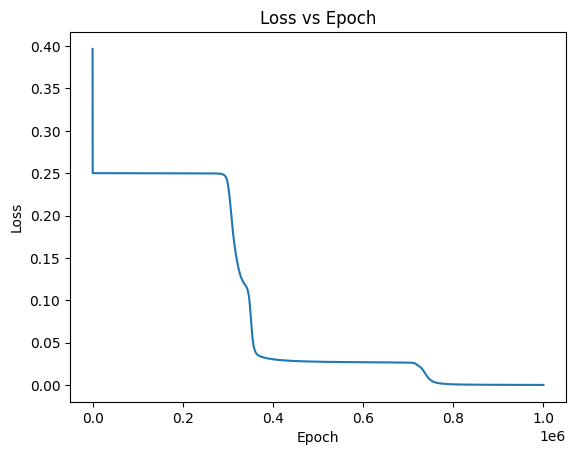

Layer 1
W = [[5.47670717 3.56484642 2.54088284 6.6081715  1.53953214 5.79390602
  3.52024126]
 [5.47457984 3.6127156  2.54111926 6.62462703 1.28470313 5.79524584
  3.45265156]
 [5.47409403 3.76868613 2.54120408 6.60135018 1.20504017 5.79432451
  3.31769488]
 [5.47536307 3.53692259 2.54085445 6.61615238 1.47290378 5.79005303
  3.50391779]
 [5.47501739 3.61355404 2.5414338  6.60861875 1.13301058 5.80329315
  3.53604013]]
b = [[-18.30826283  -1.43133706 -11.53469817 -10.23993412  -0.28500419
  -13.59418347  -1.34587258]]
Layer 2
W = [[ 13.4339122 ]
 [ -6.43410416]
 [-13.00160894]
 [ 13.99096383]
 [ -0.68241258]
 [-14.24304215]
 [ -5.89431951]]
b = [[6.62311109]]


In [33]:
nn_even_5 = SigmoidNN([5,7,1], x_5, x_5_even_parity_y, 0.1, 1000000, loss_func="mse")
nn_even_5.train(print_epoch=10000)
nn_even_5.plot_loss()
nn_even_5.print_weights_and_biases()